# Exercise 1: Dimension reduction with PCA

In this exercise, we use the census crime data that we've used before..

We will be doing some PCA on these data. PCA is about dimension-reduction so we will creating synthetic variables that try to capture most variation and studying the contributions of each variable to this. To remind you, each row (sample/record) is a "community" (small geographical region) with census data (and crime) recorded.

Using real and messy data often makes the interpretation more difficult. In this exercise, you will see first-hand an example of what happens if we include some invalid features.

In [1]:
# Step 1 : Load the data (above) in a DataFrame.
import pandas as pd 
df = pd.read_csv("downloads/censusCrimeClean.csv")
df

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [2]:
#Step 2: Since PCA only works with numerical data, extract all the data except the first column (which is text) and 
#store as a variable.

features = df.loc[:,"fold":"ViolentCrimesPerPop"]
features

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [3]:
#Step 3: Create and fit PCA with two components with these features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(features)

PCA(n_components=2)

In [4]:
#step 4: Look at the explained_variance_ratio_. How much of the variation are these two components capturing?
print(pca.explained_variance_ratio_)
# 67% of variance explained in first componennt (x-axis) , 9% variance explained by 2nd component whilst 
# 25% unexplained.

[0.67387831 0.08863102]


In [5]:
#step 4: Try standardising the variables and see what effect that has. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
standardized_features = scale.fit_transform(features)
standardized_features

array([[-1.56422682,  1.04361188, -0.81499701, ...,  0.13369936,
         0.1673161 , -0.16305118],
       [-1.56422682, -0.45393678, -1.85363638, ..., -0.55581688,
         1.25903177,  1.85475295],
       [-1.56422682, -0.45393678, -0.26512911, ..., -0.11255644,
        -0.61871918,  0.82438488],
       ...,
       [ 1.56841624,  0.80715683, -0.57061128, ...,  0.42920632,
         0.07997885, -0.03425517],
       [ 1.56841624,  0.17661003,  0.2847388 , ...,  0.72471328,
         0.73500825, -0.20598319],
       [ 1.56841624,  1.12243023,  1.9343425 , ...,  0.330704  ,
        -0.4877133 ,  1.0390449 ]])

In [6]:
#step 4: Try standardising the variables and see what effect that has. 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(standardized_features)
print(pca.explained_variance_ratio_)
# There is less variation in both components.

[0.25267231 0.16667711]


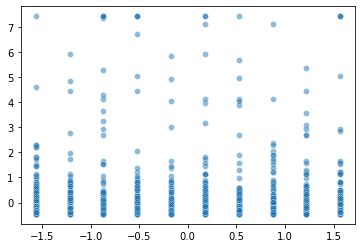

In [7]:
#Step 5: Transform the samples into the principal components and plot them on a scatterplot. Each dot (sample) is a "community" (small geographical region). How does this look?
import matplotlib.pyplot as plt 
import seaborn as sns
sns.scatterplot(x=standardized_features[:,0],y=standardized_features[:,1],data=df,alpha=0.5)
plt.show()

In [8]:
import numpy as np
c = pd.DataFrame(pca.components_)
c = np.transpose(abs(c))
c.columns=["PC1","PC2"]
c

,PC1,PC2
0,0.007828,0.004366
1,0.053072,0.087973
2,0.008423,0.114270
3,0.107445,0.006548
4,0.116775,0.118141
...,...,...
96,0.014163,0.069797
97,0.026372,0.028719
98,0.033880,0.137881
99,0.018852,0.105247


In [9]:
c.sort_values("PC1",ascending=True)

,PC1,PC2
15,0.002223,0.018682
92,0.003111,0.212684
0,0.007828,0.004366
2,0.008423,0.114270
48,0.008579,0.067961
...,...,...
29,0.172042,0.008457
16,0.173321,0.019820
45,0.174488,0.012355
13,0.179412,0.068525


In [10]:
# Step 7 Repeat with this variable removed.
c.drop("PC1",axis=1)

,PC2
0,0.004366
1,0.087973
2,0.114270
3,0.006548
4,0.118141
...,...
96,0.069797
97,0.028719
98,0.137881
99,0.105247


[0.25267231 0.16667711]


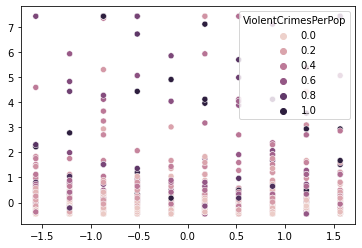

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(standardized_features)
print(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt 
import seaborn as sns
sns.scatterplot(x=standardized_features[:,0],y=standardized_features[:,1],data=df,hue="ViolentCrimesPerPop")
plt.show()


# Exercise 2: Multidimensional scaling

In this example, we will be using data on London Boroughs made available in London Datastore. We will be using multidimensional scaling to plot them from multidemensional space into an abstract two dimensional space. The distances between borough will reflect their multidimensional similarity based on the numerical features we give them. This exercise will let you try different measures of similarity by choosing different features.

Although we can use PCA for this, MDS is non-linear and does a better job of capturing local differences (try PCA too, if you like).



In [12]:
# Step 1 = Load the data from here.
import pandas as pd 
londonBorough = pd.read_csv("downloads/london-borough-profiles.csv")
londonBorough

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3
5,E09000006,Bromley,Outer London,327900,140602,"15,013",21.8,40.2,19.9,62.6,...,7.4,3.3,16,5.2,148,Cons,85,11.7,0,40.8
6,E09000007,Camden,Inner London,242500,107654,"2,179",111.3,36.4,17.3,71.0,...,7.1,3.6,21.3,3.9,164,Lab,22.2,74.1,1.9,38.7
7,E09000008,Croydon,Outer London,386500,159010,"8,650",44.7,37.0,22.0,64.9,...,7.2,3.3,24.5,6.5,178,Lab,42.9,57.1,0,38.6
8,E09000009,Ealing,Outer London,351600,132663,"5,554",63.3,36.2,21.4,66.8,...,7.3,3.6,23.8,6.9,164,Lab,17.4,76.8,5.8,41.2
9,E09000010,Enfield,Outer London,333000,130328,"8,083",41.2,36.3,22.8,64.4,...,7.3,2.6,25.2,7.0,152,Lab,34.9,65.1,0,38.2


In [18]:
# Step 2 : This is a messy dataset with lots of missing value with odd characters. I recommend you extract all the numerical columns to use as the features. This code will force everything into numerical data types, will use NAN for anything it can't convert and then drops all the columns that are filled with NANs.
londonBorough_feat = londonBorough.apply(pd.to_numeric, errors='coerce')
londonBorough_feat = londonBorough_feat.dropna(axis=1, how='all')
#Fill the NANs with the column mean and centralise them (subtract the column mean from each value)
londonBorough_feat = londonBorough_feat.fillna(londonBorough.mean())

from sklearn.preprocessing import scale
X_scaled = scale(londonBorough_feat)
print("Mean of Unscaled Features: {}".format(np.mean(londonBorough_feat))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(londonBorough_feat)))
# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: GLA_Population_Estimate_2017                                 3.897766e+06
GLA_Household_Estimate_2017                                  3.001636e+05
Inland_Area_(Hectares)                                       2.900000e+02
Population_density_(per_hectare)_2017                        7.408056e+01
Average_Age,_2017                                            3.652895e+01
                                                                 ...     
Mortality_rate_from_causes_considered_preventable_2012/14    1.722286e+02
Proportion_of_seats_won_by_Conservatives_in_2014_election    3.264286e+01
Proportion_of_seats_won_by_Labour_in_2014_election           5.735000e+01
Proportion_of_seats_won_by_Lib_Dems_in_2014_election         6.548571e+00
Turnout_at_2014_local_elections                              3.883143e+01
Length: 73, dtype: float64
Standard Deviation of Unscaled Features: GLA_Population_Estimate_2017                                 1.356485e+07
GLA_Household_Est

/Users/sufyaanshaikh/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/sufyaanshaikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/sufyaanshaikh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/nanops.py:892: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


In [19]:
# step3 We need to compute a distance matrix of pairwise similarites. We will used Euclidean distances, but of course you could use anything appropriate. You put londonBorough_feat in twice so its every borough to every borough.

from sklearn.metrics import euclidean_distances
distMatrix = euclidean_distances(londonBorough_feat, londonBorough_feat)
distMatrix

/Users/sufyaanshaikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:314: RuntimeWarning: invalid value encountered in add
  distances += XX


array([[       0.        ,   744015.40379871,   651024.7682225 , ...,
        11167403.06622404, 67414704.63568358,               inf],
       [  744015.40379871,        0.        ,   313923.77436517, ...,
        11181195.00663   , 67411848.42775224,               inf],
       [  651024.7682225 ,   313923.77436517,        0.        , ...,
        10942355.34293245, 67183745.39807709,               inf],
       ...,
       [11167403.06622404, 11181195.00663   , 10942355.34293245, ...,
               0.        , 57079282.01064172,               inf],
       [67414704.63568358, 67411848.42775224, 67183745.39807707, ...,
        57079282.01064172,        0.        ,               inf],
       [              inf,               inf,               inf, ...,
                      inf,               inf,               nan]])

In [20]:
# Step 4 
#Use scikit-learn's MDS function to perform MDS on the data and project the points to a lower-dimensional space (using MDS's fit_transform()). Here's is a (more complicated) example.
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

mds = MDS(random_state=0)
X_transform = mds.fit_transform(X_scaled)
print(X_transform)

[[ 11.08677614 -12.64306349]
 [ -1.02225674   9.92736932]
 [ -4.61635042  -1.91910163]
 [ -6.46607103  -4.40807981]
 [ -2.04321334   6.77963389]
 [ -4.83225985  -8.12804116]
 [  7.24325572  -2.07542213]
 [ -1.85563644   0.12576009]
 [ -2.51804067   3.67195234]
 [ -3.27645178   1.04085046]
 [  0.47119593   6.03275864]
 [  6.00755526   4.94388779]
 [  4.71883966  -3.03525122]
 [  1.83516225   2.65776176]
 [ -8.04078535  -0.02463285]
 [ -8.08833944  -4.18948986]
 [ -2.8886954   -1.9692757 ]
 [ -2.1020721    2.41555629]
 [  7.16010325   0.82033052]
 [  5.45483252  -6.27610825]
 [ -2.56188537  -7.47242343]
 [  6.77686602   2.62346284]
 [  3.16193405   2.78698281]
 [ -0.65026473  -4.08771646]
 [  2.90506425  12.45251548]
 [ -4.96148053   3.35861502]
 [ -3.0369484  -11.85325244]
 [  4.62583935   1.8345037 ]
 [ -6.36167659  -6.94722338]
 [  7.70661975   7.78741403]
 [ -0.01602388   3.93769679]
 [  3.05676266  -7.31600286]
 [ 12.62434398  -1.93341316]
 [  3.12474378   6.06858894]
 [ -0.84584383

In [21]:
stress = mds.stress_
print(stress)

5657.1873410766175


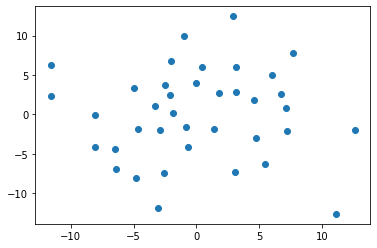

In [22]:
plt.scatter(X_transform[:,0],X_transform[:,1])

# Exercise 3: Group wines based on their characteristics


 In this exercise, we'll use a (classic) dataset on features of wines. Information on the data set is here. You can download a CSV file here. The data contains 178 different wines and 13 features that describe them.

This is a labelled dataset. The wines are already classified and the classes/labels are indicated in the first column. This makes this dataset suitable for use for supervised methods. However, we will use unsupervised clustering here.

In [23]:
# Step 1 : Load the data, extract and store the features to use 
#(start will all except the first columns - the first column is the known classes that we won't be using), 
# and extract and store the known labels.

import pandas as pd 
Wine = pd.read_csv("downloads/wine.csv")
features = Wine.columns
Wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [24]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

X = Wine.drop(['Class label'], axis = 1)
Y = Wine['Class label']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [25]:
# Step 2 : Use the k-means method to cluster the features into 3 clusters.
from sklearn.cluster import KMeans
import numpy as np
est = KMeans(3)
est.fit(X)

KMeans(n_clusters=3)

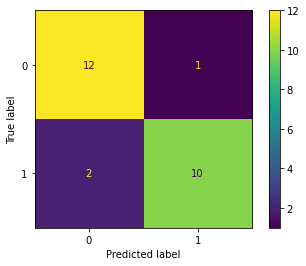

In [26]:
# step 3 Compare the known labels with the cluster labels. Important note although these labels happen to look 
# the same, they in fact do not relate to each other directly. Think of them as totally separate categories. 
# The clustering algorithm allocates labels arbitrarily!. So try to find an equivalence mapping
# between the known and cluster labels. If you do, you could use a confusion matrix to see how much they correspond.
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

[[ 3.18564055e+02  2.14907729e+01]
 [ 3.03098514e+02 -5.36608268e+00]
 [ 4.38062063e+02 -6.53798613e+00]
 [ 7.33240711e+02  1.93319951e-01]
 [-1.15699516e+01  1.84872549e+01]
 [ 7.03231800e+02 -3.31723191e-01]
 [ 5.42972384e+02 -1.35191971e+01]
 [ 5.48402656e+02  1.14491475e+01]
 [ 2.98037964e+02 -8.18149185e+00]
 [ 2.98050654e+02 -7.10283985e+00]
 [ 7.63080247e+02 -8.33356923e+00]
 [ 5.32944043e+02 -1.42878810e+01]
 [ 5.72835177e+02 -2.10050612e+01]
 [ 4.02926332e+02 -1.61035066e+01]
 [ 8.00053884e+02 -1.21175637e+01]
 [ 5.63246356e+02  2.21467383e+00]
 [ 5.33380465e+02  1.08044932e+01]
 [ 3.83318588e+02  8.47646622e+00]
 [ 9.33118716e+02 -8.35296527e+00]
 [ 9.84045208e+01  1.43903679e+01]
 [ 3.35950160e+01  2.55653372e+01]
 [ 2.31478724e+01  1.81494036e+00]
 [ 2.88094143e+02 -3.96443421e+00]
 [ 2.67982650e+02 -9.57214118e+00]
 [ 9.80212296e+01 -5.49802950e+00]
 [ 8.35001052e+01  2.28893066e+01]
 [ 4.47926515e+02 -1.47979648e+01]
 [ 5.37919974e+02 -1.53885770e+01]
 [ 1.68211726e+02  4

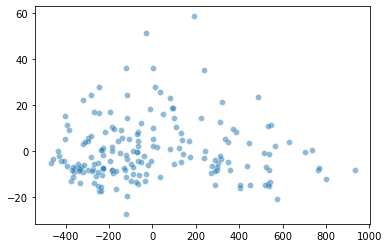

In [27]:
# step 4 So, it is more effective to plot the wines in a scatterplot using a consistent layouts 
#(try PCA or MDS) and colour the dots first by the known labels and then the cluster labels
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Wine)
pca.components_
x_pca = pca.transform(Wine)
print(x_pca)
print(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt 
import seaborn as sns
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],data=Wine,alpha=0.5)
plt.show()

# Exercise 4: Cross-validation


In [28]:
#1.Load the load (you already did in exercise 1) and identify your dependent and independent variable
import pandas as pd 
census = pd.read_csv("downloads/censusCrimeClean.csv")
independent=census["medIncome"]
dependent = census["ViolentCrimesPerPop"]

In [29]:
#2. Use the code below to split your data using the k-fold approach. 
#Where k=5, the data is split 5 times. In each split, a fifth used for testing and four fifths for training.
from sklearn.model_selection import KFold
import scipy.stats as stats
import numpy as np
    
kf = KFold(n_splits=5)
foldCount = 0
for train_idxs, test_idxs in kf.split(census):
    print("Run: ", foldCount)
    #print(len(census),len(train_idxs),len(test_idxs))
    #put your code here
    foldCount += 1 

Run:  0
Run:  1
Run:  2
Run:  3
Run:  4


In [30]:
#3. For each fold (i.e. out the code within the loop
#Extract the test (unseen) and training subset
#Build a regression model on the training set and report its parameters.
#Plot
#Predict values for the test set
#Report the residuals

In [63]:
dependentSubset = dependent[train_idxs]
independentSubset = independent[train_idxs]
dependentSubsetUnseen = dependent[test_idxs]
independentSubsetUnseen = independent[test_idxs]

print(np.array(dependentSubset).reshape(-1,1))
print(np.array(independentSubset).reshape(-1,1))

[[0.2 ]
 [0.67]
 [0.43]
 ...
 [0.02]
 [0.24]
 [0.87]]
[[0.37]
 [0.31]
 [0.3 ]
 ...
 [0.5 ]
 [0.29]
 [0.19]]


In [69]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(np.array(dependentSubset).reshape(-1,1), np.array(independentSubset).reshape(-1,1))
print("intercept:",m.intercept_)
print("coefficients:",m.coef_)

intercept: [0.44975226]
coefficients: [[-0.37842977]]


In [76]:
y_pred = m.predict(np.array(independentSubsetUnseen).reshape(-1,1))
y_pred

array([[0.22269439],
       [0.41947787],
       [0.28324316],
       [0.24918448],
       [0.30973324],
       [0.43461506],
       [0.28324316],
       [0.32108613],
       [0.38541919],
       [0.34379192],
       [0.34757622],
       [0.31351754],
       [0.370282  ],
       [0.30216465],
       [0.36649771],
       [0.29459605],
       [0.34000762],
       [0.30216465],
       [0.08645968],
       [0.07132249],
       [0.2189101 ],
       [0.32108613],
       [0.08267538],
       [0.32487043],
       [0.39677209],
       [0.23404729],
       [0.18863572],
       [0.35136052],
       [0.35136052],
       [0.36649771],
       [0.33243903],
       [0.12051836],
       [0.31730184],
       [0.34757622],
       [0.3778506 ],
       [0.13943985],
       [0.33243903],
       [0.40812498],
       [0.23404729],
       [0.26432167],
       [0.40055639],
       [0.28702746],
       [0.30973324],
       [0.31351754],
       [0.34379192],
       [0.35892911],
       [0.07132249],
       [0.268

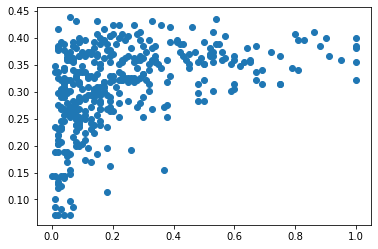

In [77]:
plt.scatter(dependentSubsetUnseen,y_pred)

In [81]:
residuals =  y_pred - np.array(dependentSubsetUnseen)
residuals

array([[ 0.08269439, -0.23730561, -0.02730561, ..., -0.00730561,
         0.03269439, -0.25730561],
       [ 0.27947787, -0.04052213,  0.16947787, ...,  0.18947787,
         0.22947787, -0.06052213],
       [ 0.14324316, -0.17675684,  0.03324316, ...,  0.05324316,
         0.09324316, -0.19675684],
       ...,
       [ 0.19243903, -0.12756097,  0.08243903, ...,  0.10243903,
         0.14243903, -0.14756097],
       [ 0.14324316, -0.17675684,  0.03324316, ...,  0.05324316,
         0.09324316, -0.19675684],
       [ 0.15838035, -0.16161965,  0.04838035, ...,  0.06838035,
         0.10838035, -0.18161965]])